In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

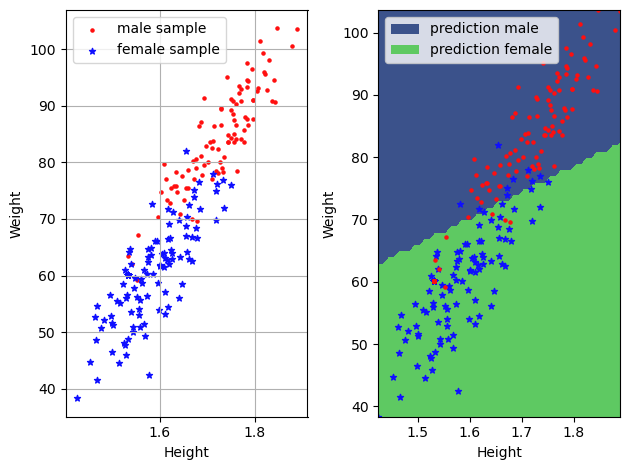

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y,tx)
    # w = least squares with respect to tx and y
    # raise NotImplementedError

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [23]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    # raise NotImplementedError
    return 1.0 / (1 + np.exp(-t))

In [24]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    y_hat = sigmoid(tx.dot(w))
    loss = y.T.dot(np.log(y_hat)) + (1 - y).T.dot(np.log(1 - y_hat))

    return np.squeeze(-loss)
    # ***************************************************
    

In [25]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    y_hat = sigmoid(tx.dot(w))
    gradient = tx.T.dot(y_hat - y)
    return gradient
    # ***************************************************

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [26]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    gradient = calculate_gradient(y, tx, w)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    w = w - (gamma * gradient)
    # ***************************************************
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.545892808759405
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.96487063560558
Current iteration=500, loss=40.92008945871305
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.898349946689954
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.89533753382109
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.894829923283595
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


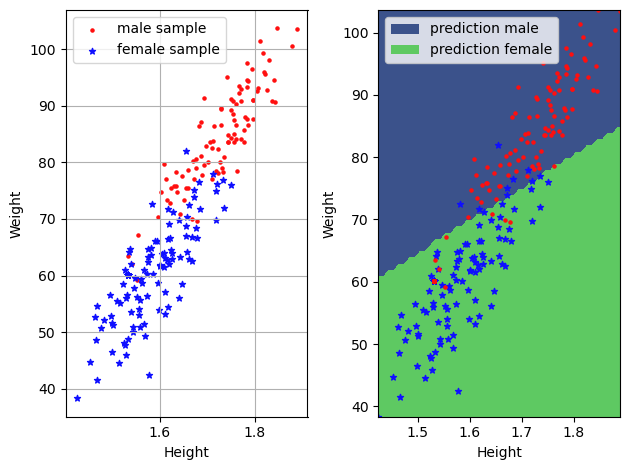

In [27]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [28]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    y_hat = sigmoid(tx.dot(w))
    # print(y_hat.shape) 200 ,1

    y_hat = np.diag(np.squeeze(y_hat)) 
    # print(y_hat[0].shape)
    mul = np.multiply(y_hat, (1-y_hat))
    # print(mul.shape ,     tx.shape , w.shape)
    return tx.T.dot(mul).dot(tx)
    # ***************************************************

Write a function below to return loss, gradient, and Hessian.

In [29]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian
    # ***************************************************

### Using Newton's method
Use Newton's method for logistic regression.

In [30]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    w = w - (np.linalg.solve(hessian, gradient))
    # ***************************************************
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.411553739095936
Current iteration=2, the loss=47.304586199350645
Current iteration=3, the loss=41.99746742248449
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648957
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989058
loss=40.89482560989058


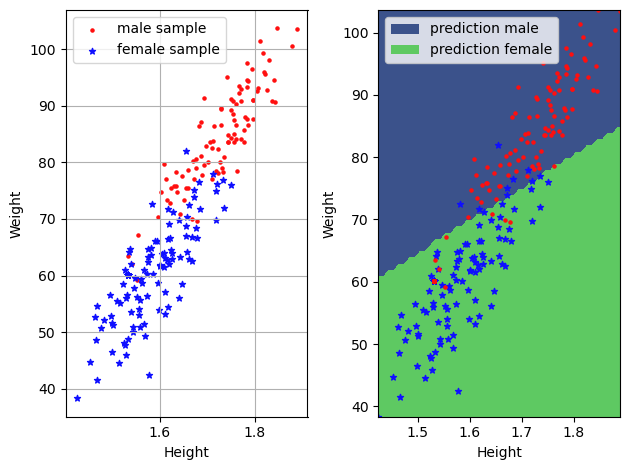

In [31]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [32]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # num_samples = y.shape[0]
    
    loss = calculate_loss(y, tx, w) + lambda_ * np.squeeze(w.T.dot(w))
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    return loss, gradient
    # ***************************************************

In [33]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    # raise NotImplementedError
    loss  , gradient = penalized_logistic_regression(y,tx,w,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * gradient
    # raise NotImplementedError
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=46.076072692504965
Current iteration=200, loss=45.136990805865345
Current iteration=300, loss=45.02816989532987
Current iteration=400, loss=45.013256927182994
Current iteration=500, loss=45.011094778803134
Current iteration=600, loss=45.01077474325605
Current iteration=700, loss=45.01072699869884
Current iteration=800, loss=45.01071985437807
loss=41.80587008659322


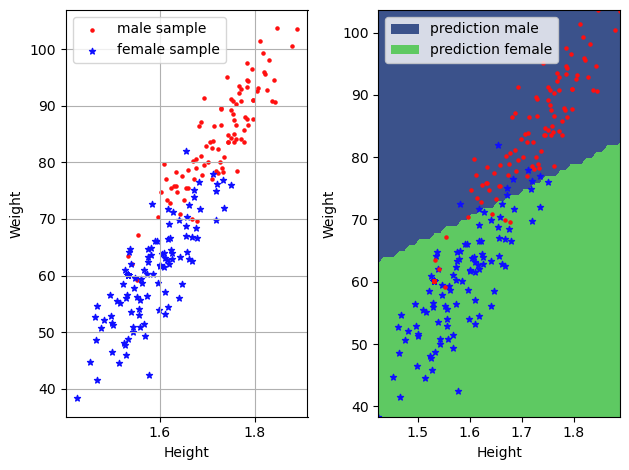

In [34]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)